In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rouge_score import rouge_scorer
from sklearn.metrics import accuracy_score
import os

In [2]:
#ESTILO GRÁFICO
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("C:/Users/calag/Desktop/nlp-proyecto4-susti/results/respuestas_prompts.csv")

# Mostrar las primeras filas para verificar
df.head()

,id,texto,label,respuesta_p1,respuesta_p2,respuesta_p3
0,1,Me encantó la película,positivo,Sentimiento: positivo,Sentimiento: positivo,positivo
1,2,No me gustó para nada,negativo,Sentimiento: Negativo,Sentimiento: negativo,Texto: No me gustó para nada → negativo
2,3,La comida estaba bien pero no espectacular,neutro,El sentimiento del texto es neutro. Aunque se ...,Sentimiento: neutro,Texto: La comida estaba bien pero no espectacu...


In [5]:
# ROUGE-L: COMPARA SUPERPOSICIÓN DE FRASES ENTRE LA PREDICCIÓN Y LA VERDAD
def calcular_rouge(y_true, y_pred):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    puntajes = [scorer.score(str(ref), str(pred))['rougeL'].fmeasure for ref, pred in zip(y_true, y_pred)]
    return sum(puntajes) / len(puntajes)

# EXACTITUD (Accuracy): PROPORCIÓN DE RESPUESTAS CORRECTAS
def calcular_exactitud(y_true, y_pred):
    #NORMALIZAR MAYÚSCULAS/MINÚSCULAS Y ESPACIOS
    y_true_clean = [str(x).strip().lower() for x in y_true]
    y_pred_clean = [str(x).strip().lower() for x in y_pred]
    return accuracy_score(y_true_clean, y_pred_clean)

#LONGITUD PROMEDIO DE RESPUESTAS
def calcular_longitud_promedio(respuestas):
    return sum(len(str(r).split()) for r in respuestas) / len(respuestas)

In [6]:
metricas = {}

for i in range(1, 4):
    pred_col = f"respuesta_p{i}"
    acc = calcular_exactitud(df["label"], df[pred_col])
    rouge = calcular_rouge(df["label"], df[pred_col])
    long_prom = calcular_longitud_promedio(df[pred_col])

    metricas[f"Prompt {i}"] = {
        "Exactitud": acc,
        "ROUGE-L": rouge,
        "Longitud promedio": long_prom
    }

#CONVERTIMOS A DATAFRAME PARA VISUALIZACIÓN
df_metricas = pd.DataFrame(metricas).T
df_metricas.reset_index(inplace=True)
df_metricas.rename(columns={"index": "Prompt"}, inplace=True)

#MOSTRAR MÉTRICAS EN TABLA
print("Métricas comparativas:")
df_metricas

Métricas comparativas:


,Prompt,Exactitud,ROUGE-L,Longitud promedio
0,Prompt 1,0.000000,0.467433,10.000000
1,Prompt 2,0.000000,0.666667,2.000000
2,Prompt 3,0.333333,0.483333,6.333333


C:\Users\calag\AppData\Local\Temp\ipykernel_32636\1381912683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metricas, x="Prompt", y="Exactitud", ax=axes[0], palette="viridis")
C:\Users\calag\AppData\Local\Temp\ipykernel_32636\1381912683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metricas, x="Prompt", y="ROUGE-L", ax=axes[1], palette="magma")
C:\Users\calag\AppData\Local\Temp\ipykernel_32636\1381912683.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metricas, x="Prompt", y="Longitud promedio", ax=axe

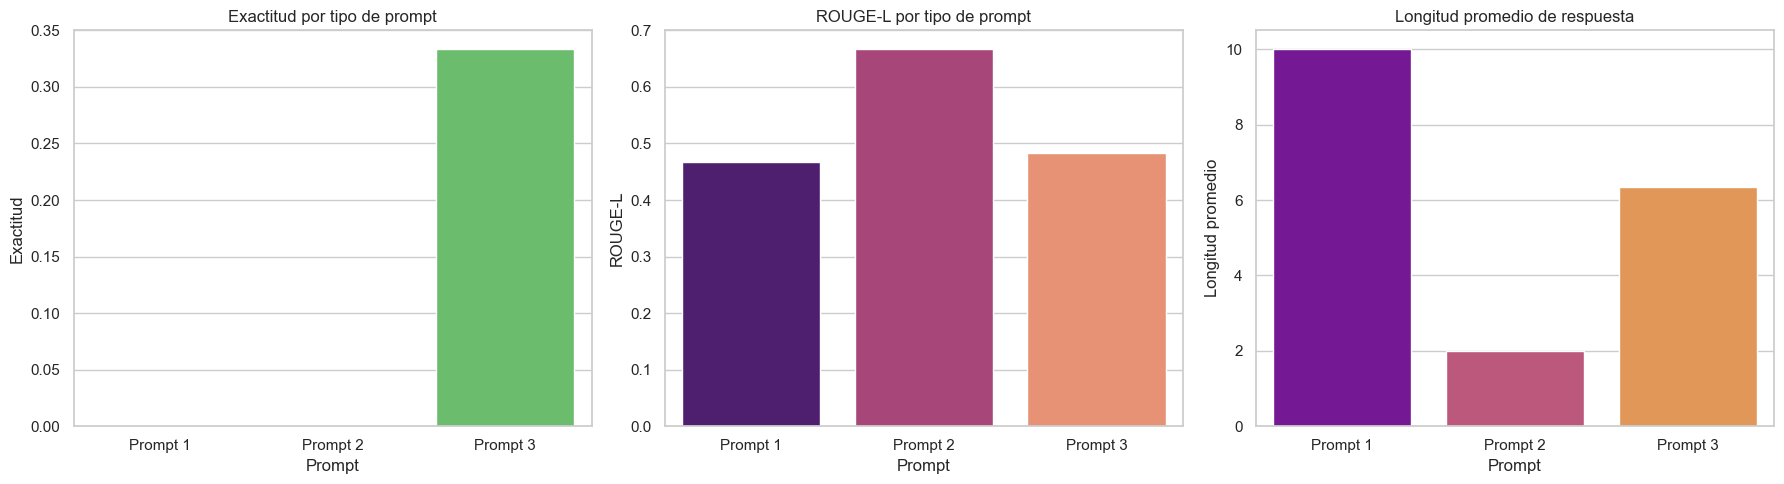

In [7]:
#BARPLOT PARA CADA MÉTRICA
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df_metricas, x="Prompt", y="Exactitud", ax=axes[0], palette="viridis")
axes[0].set_title("Exactitud por tipo de prompt")

sns.barplot(data=df_metricas, x="Prompt", y="ROUGE-L", ax=axes[1], palette="magma")
axes[1].set_title("ROUGE-L por tipo de prompt")

sns.barplot(data=df_metricas, x="Prompt", y="Longitud promedio", ax=axes[2], palette="plasma")
axes[2].set_title("Longitud promedio de respuesta")

plt.tight_layout()
plt.show()

In [8]:
df_metricas.to_csv("../results/tabla_comparativa.csv", index=False)
print("Tabla guardada en '../results/tabla_comparativa.csv'")

Tabla guardada en '../results/tabla_comparativa.csv'
